# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
-un scatterplot est un nuage de points qui est utilisé pour montrer la relation entre deux variables
-un barplot est un diagramme en barres qui est utilisé pour comparer des quantités entre différentes catégories
-un boxplot est un diagramme en boîte qui est utilisé pour voir la répartition des données
-un violinplot est un diagramme en violon qui est utilisé de la même manière qu'un boxplot mais avec plus de détails sur la forme de la distribution
-un histogramme est une sorte de diagramme en barre qui est utilisé pour montrer comment une variable est répartie en fonction de l'aire de la barre
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [1]:
"""from google.colab import drive
drive.mount('/content/gdrive')"""

"from google.colab import drive\ndrive.mount('/content/gdrive')"

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un fichier texte.
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name : Le nom de l'organisme au niveau de l'espèce
Kingdom : La classification la plus élevée dans la taxonomie.
Group : Une classification plus précise que le Kingdom
SubGroup : Sous-catégorie par rapport au groupe.
Size (Mb) : La taille estimée du génome.
Chrs : Le nombre de chromosomes
Organelles : Le nombre d'organites, qui sont des structures spécialisées à l'intérieur des cellules.
Plasmids : Le nombre de plasmides, qui sont de petites molécules d'ADN. Ils peuvent transferer des gênes.
BioProjects : Le nombre de projets de séquençage du génome associés à cet organisme.
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [2]:
import pandas as pd
data = pd.read_csv('overview.txt', sep='\t', low_memory=False)
nbo = data.shape[0]
print("Le nombre d'organismes est:", nbo)


Le nombre d'organismes est: 87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
La classification la plus élevée dans la taxonomie.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y en a 4 qui sont: Archaea, Bacteria, Eukaryota, Viruses.
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [3]:
nbok = data.groupby(['Kingdom']).size()
print(nbok)

Kingdom
Archaea       2263
Bacteria     37492
Eukaryota    15560
Viruses      32573
dtype: int64


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Une classification plus précise que le Kingdom
```

Q9. Combien de groupes sont présents par royaume ?

In [4]:
nbgk = data.groupby(['Kingdom'])['Group'].nunique()
print(nbgk)

Kingdom
Archaea      11
Bacteria     37
Eukaryota     5
Viruses       8
Name: Group, dtype: int64


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [5]:
nbogk = data.groupby(['Kingdom','Group']).size()
print(nbogk)

Kingdom  Group                         
Archaea  Asgard group                        61
         Candidatus Hadarchaeota              8
         Candidatus Hydrothermarchaeota       6
         Candidatus Thermoplasmatota        432
         DPANN group                        249
                                           ... 
Viruses  dsRNA viruses                       30
         unclassified archaeal viruses       15
         unclassified phages               1233
         unclassified virophages              3
         unclassified viruses               684
Length: 61, dtype: int64


## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

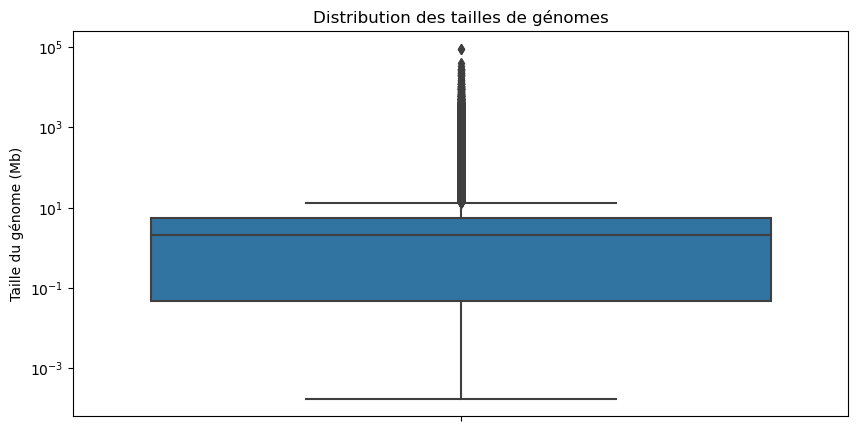

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Size (Mb)'] = pd.to_numeric(data['Size (Mb)'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.boxplot(y='Size (Mb)', data=data)
plt.title('Distribution des tailles de génomes')
plt.yscale('log')
plt.ylabel('Taille du génome (Mb)')
plt.show()

Q12. Affichez la distribution par royaume.

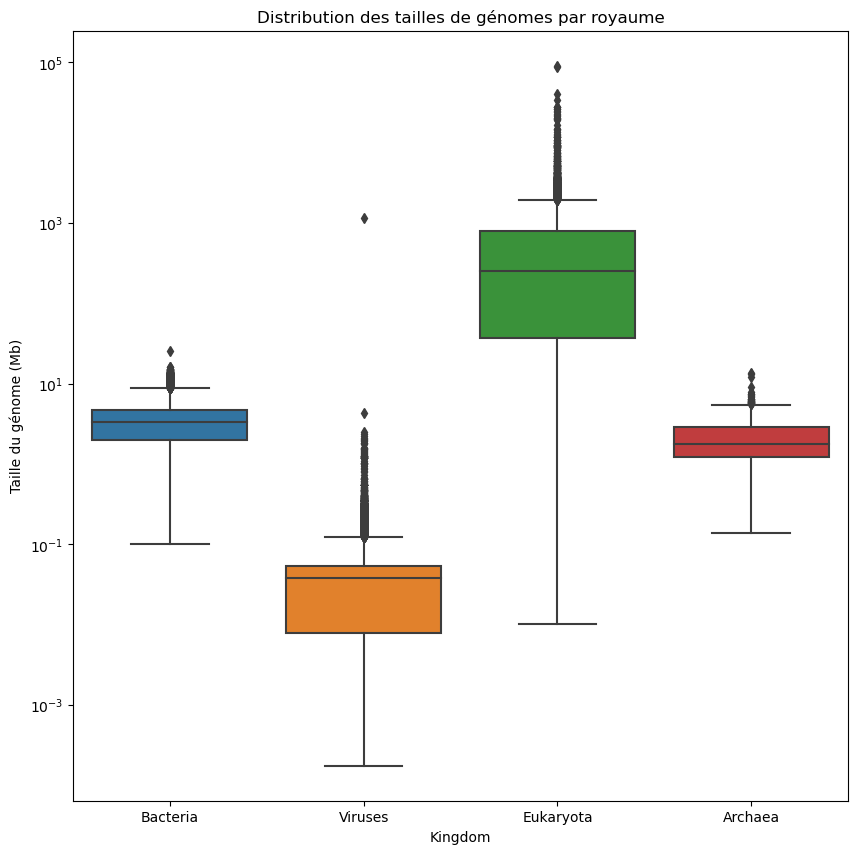

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Kingdom', y='Size (Mb)', data=data)
plt.title('Distribution des tailles de génomes par royaume')
plt.yscale('log')
plt.ylabel('Taille du génome (Mb)')
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

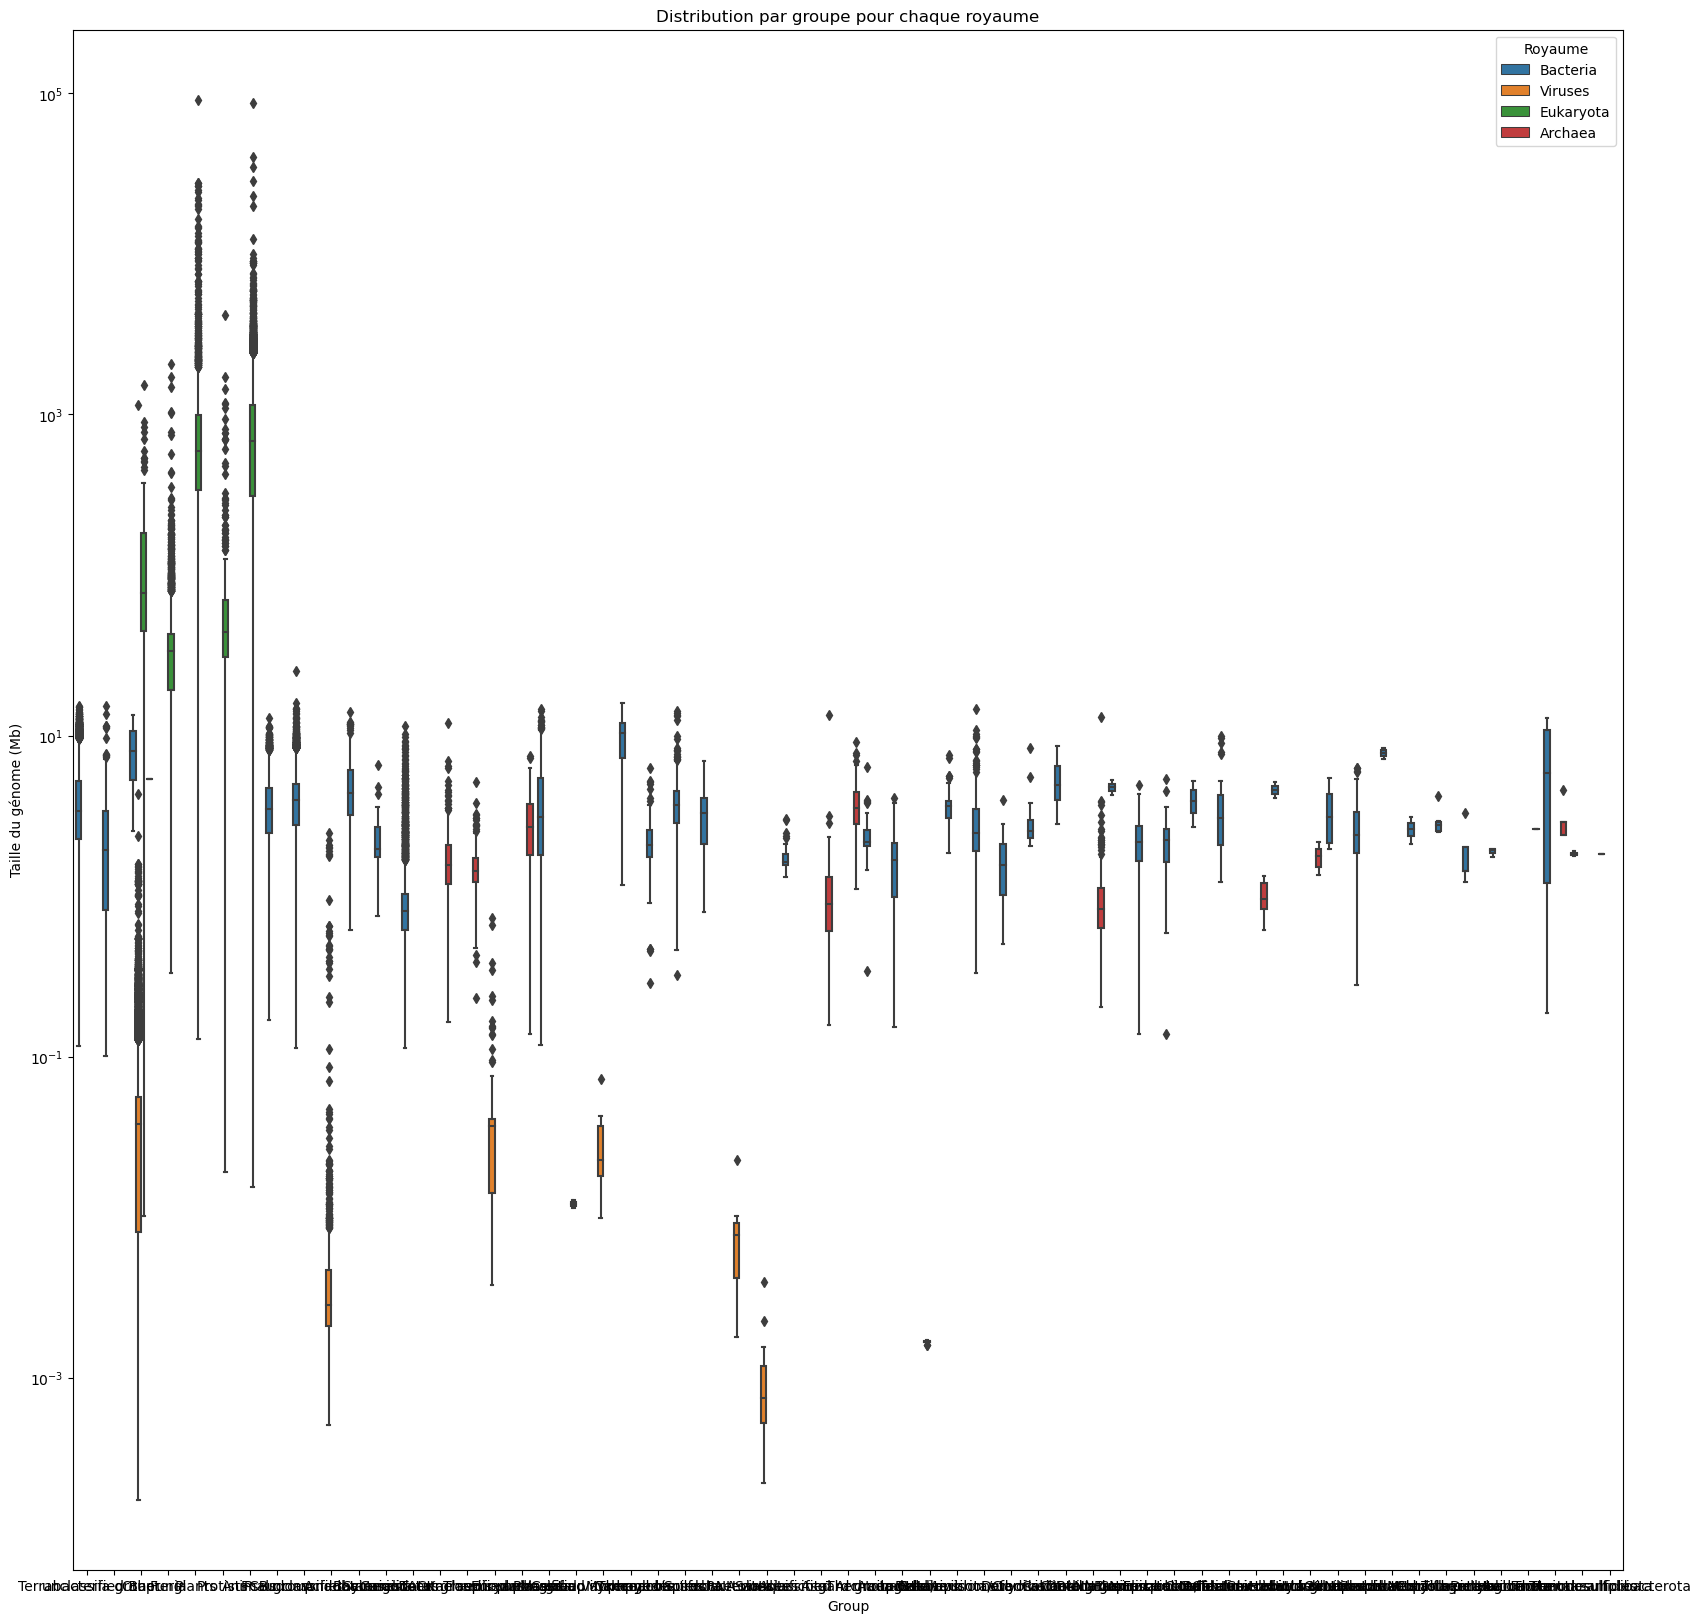

In [8]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Group', y='Size (Mb)', hue='Kingdom', data=data)
plt.title('Distribution par groupe pour chaque royaume')
plt.yscale('log')
plt.ylabel('Taille du génome (Mb)')
plt.legend(title='Royaume')
plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [9]:
lil = data.loc[data.groupby('Kingdom')['Size (Mb)'].idxmin()]
print("Organisme avec le plus petit génome pour chaque royaume :")
print(lil[['Kingdom', '#Organism/Name', 'Size (Mb)']])

Organisme avec le plus petit génome pour chaque royaume :
         Kingdom                                    #Organism/Name  Size (Mb)
13060    Archaea  candidate division MSBL1 archaeon SCGC-AAA385M02   0.137797
7691    Bacteria                              bacterium AG-323-L21   0.101587
33850  Eukaryota                       Fragilariopsis kerguelensis   0.010223
38605    Viruses                   Hippotragine gammaherpesvirus 1   0.000174


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [10]:
lil = data.loc[data.groupby('Kingdom')['Size (Mb)'].idxmax()]
print("Organisme avec le plus petit génome pour chaque royaume :")
print(lil[['Kingdom', '#Organism/Name', 'Size (Mb)']])

Organisme avec le plus petit génome pour chaque royaume :
         Kingdom    #Organism/Name   Size (Mb)
5108     Archaea          archaeon     13.3999
81774   Bacteria         Thiomonas     25.1426
85849  Eukaryota      Viscum album  91113.7000
84080    Viruses  uncultured virus   1150.6800


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

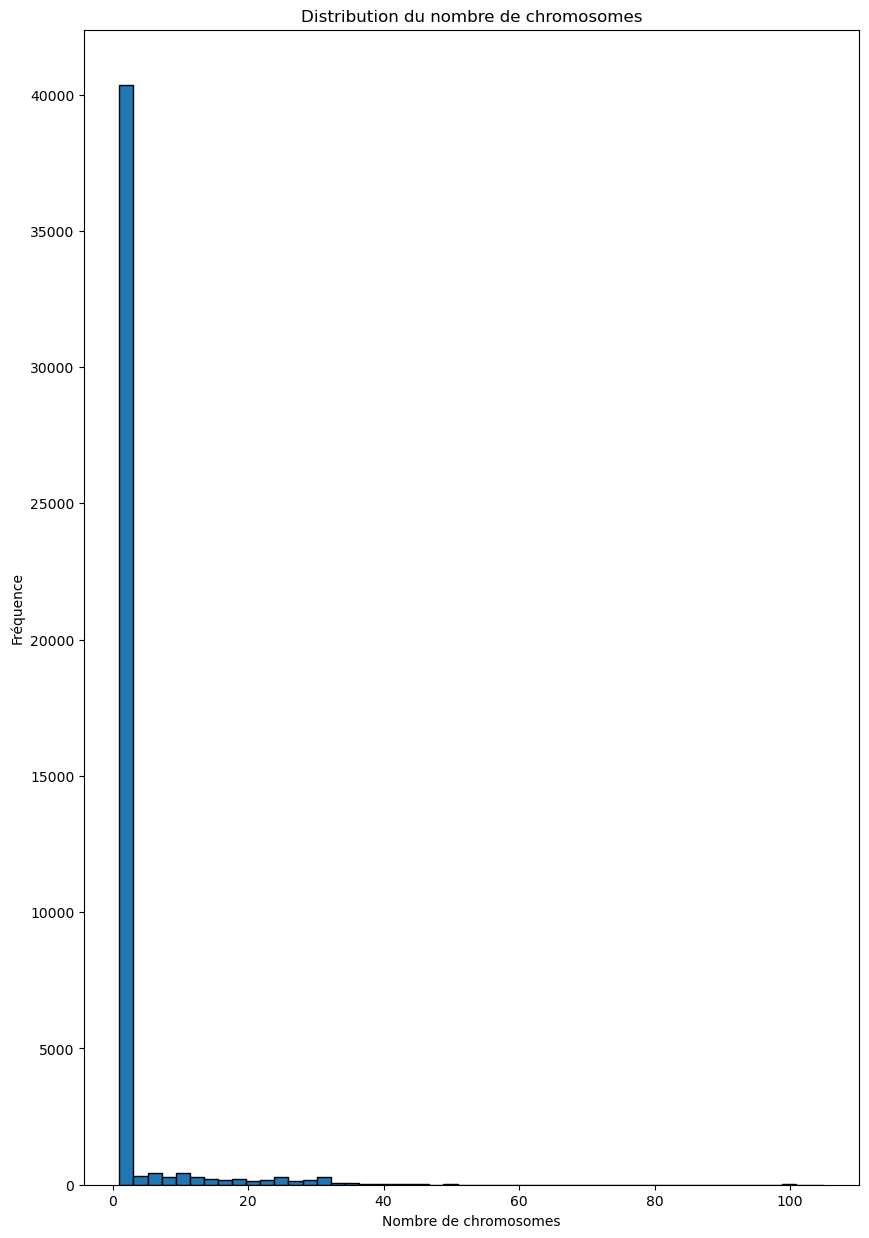

In [11]:
data['Chrs'] = pd.to_numeric(data['Chrs'], errors='coerce')
plt.figure(figsize=(10,15))
plt.hist('Chrs', bins=50, edgecolor='black', data=data)
plt.title('Distribution du nombre de chromosomes')
plt.xlabel('Nombre de chromosomes')
plt.ylabel('Fréquence')
plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

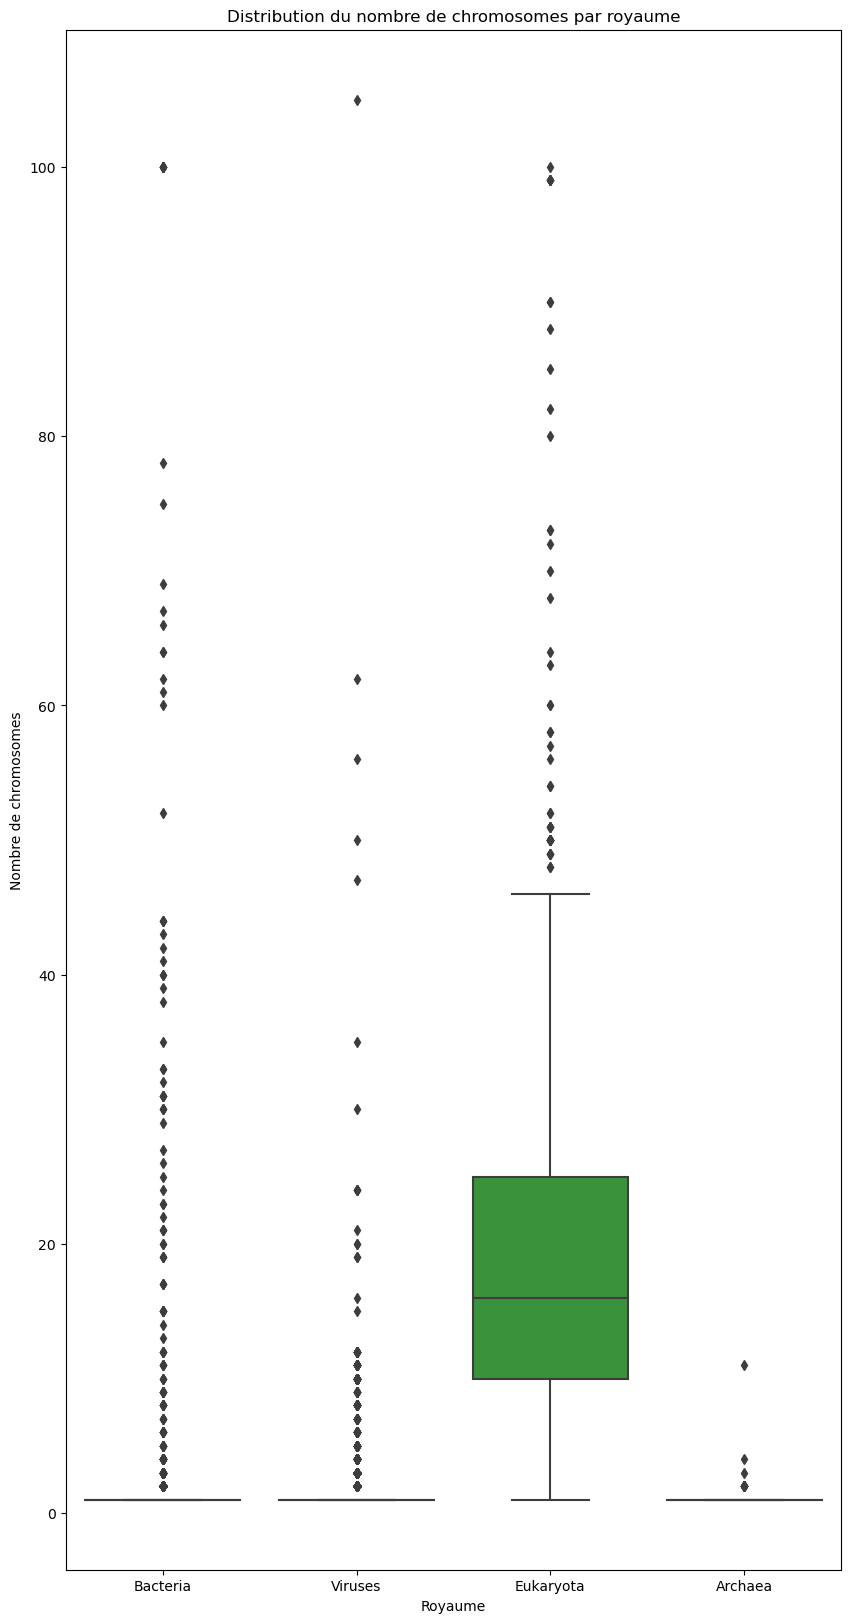

In [12]:
plt.figure(figsize=(10,20))
sns.boxplot(x='Kingdom', y='Chrs', data=data)
plt.title('Distribution du nombre de chromosomes par royaume')
plt.xlabel('Royaume')
plt.ylabel('Nombre de chromosomes')
plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Il y a considérablement plus de chromosomes chez les eukaryotes que chez les autres royaumes.
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

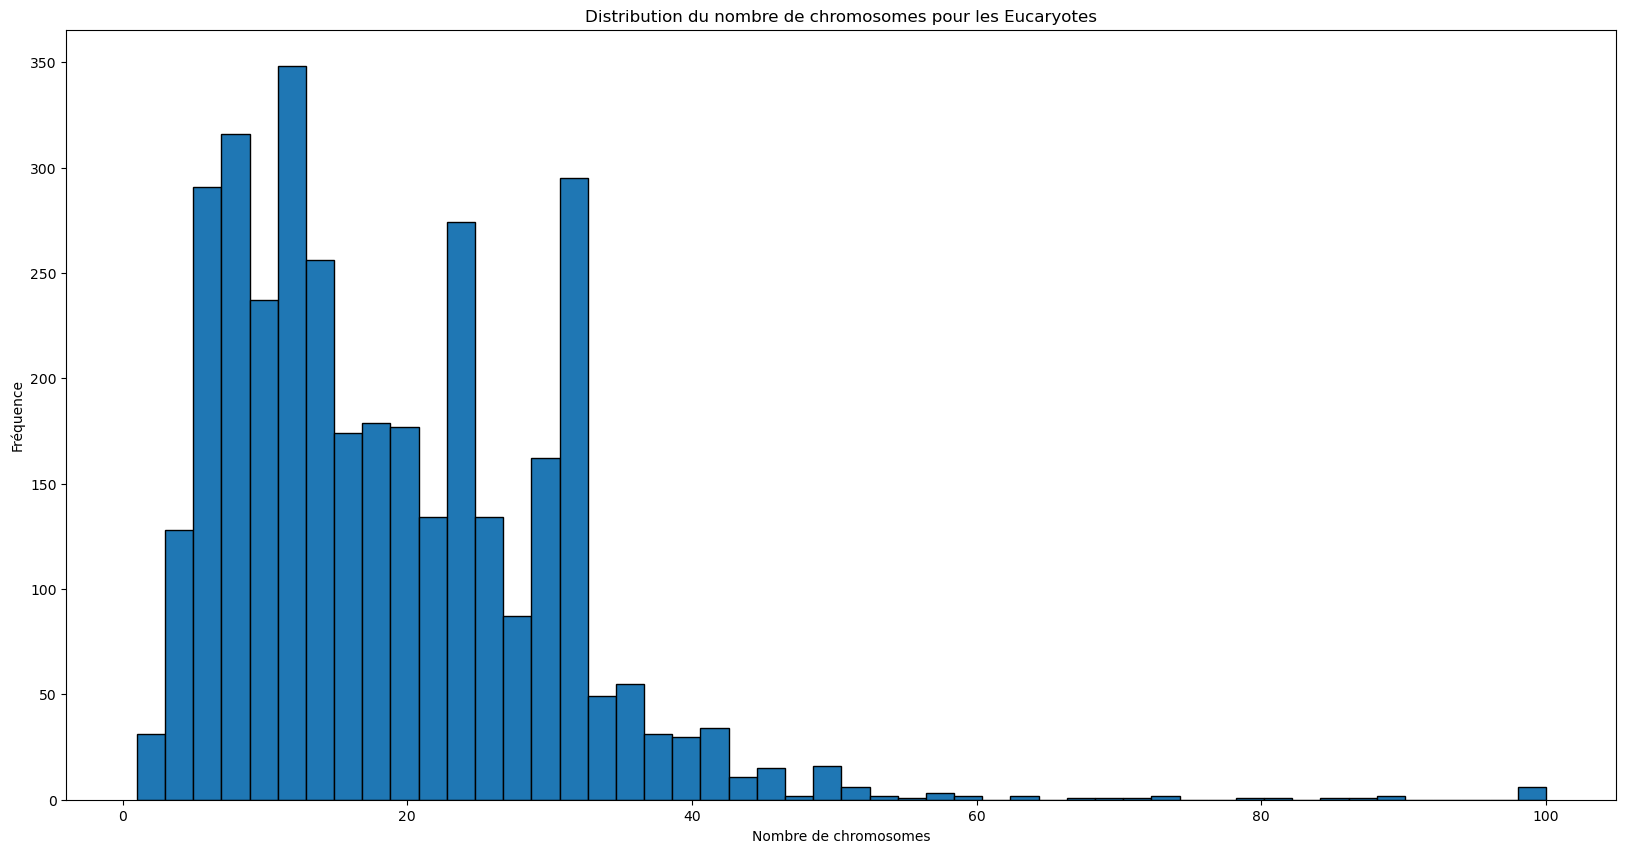

In [13]:
euc = data[data['Kingdom'] == 'Eukaryota']
eucaryotes = euc.sort_values(by='Chrs')
plt.figure(figsize=(20,10))
plt.hist(eucaryotes['Chrs'], bins=50, edgecolor='black')
plt.title('Distribution du nombre de chromosomes pour les Eucaryotes')
plt.xlabel('Nombre de chromosomes')
plt.ylabel('Fréquence')
plt.show()

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

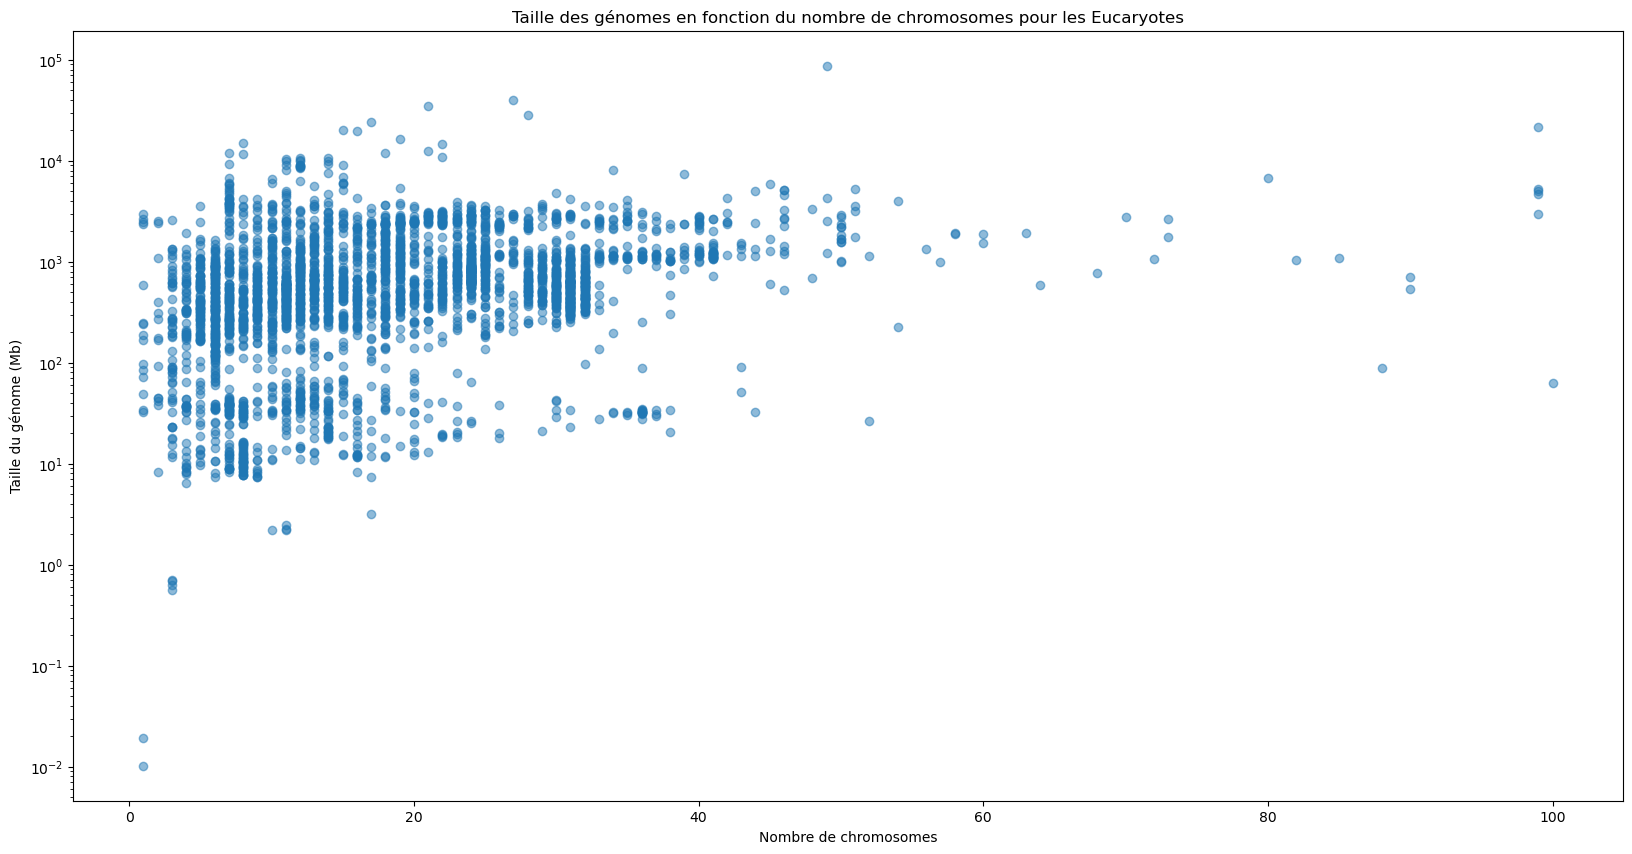

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(eucaryotes['Chrs'], eucaryotes['Size (Mb)'], alpha=0.5)
plt.title('Taille des génomes en fonction du nombre de chromosomes pour les Eucaryotes')
plt.xlabel('Nombre de chromosomes')
plt.ylabel('Taille du génome (Mb)')
plt.yscale('log')
plt.show()

Q21. Qu’observez-vous ?

```markdown
Peu importe le nombre de choromosomes pour un eukaryote, on retrouve des tailles de génome assez variées.
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d'ADN portant souvent des gènes supplémentaires qui peuvent conférer des avantages à l'organisme, comme la résistance aux antibiotiques.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

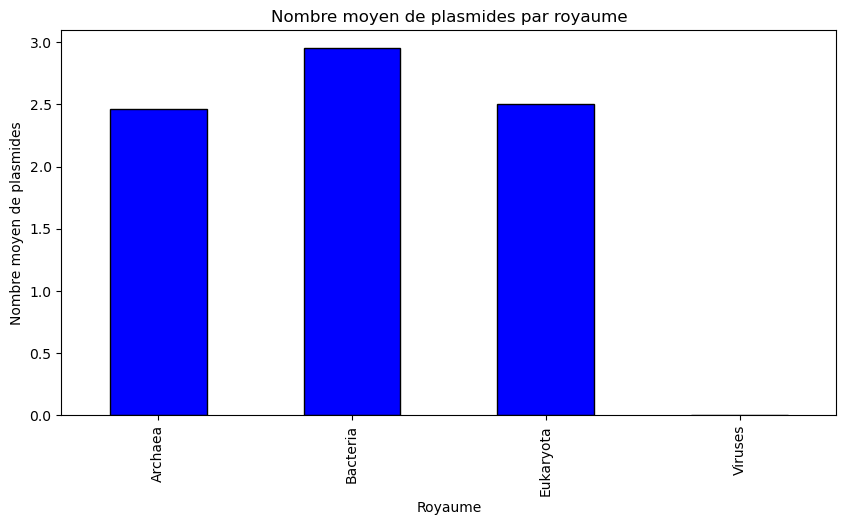

In [15]:
data['Plasmids'] = pd.to_numeric(data['Plasmids'], errors='coerce')
plasmid_means = data.groupby('Kingdom')['Plasmids'].mean()

plt.figure(figsize=(10, 5))
plasmid_means.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Nombre moyen de plasmides par royaume')
plt.xlabel('Royaume')
plt.ylabel('Nombre moyen de plasmides')
plt.show()

Q24. Qu'observez-vous ?

```markdown
Il semble y avoir un nombre moyen de plasmides assez similaire pour tous les royaumes qui est entre 2.5 et 3, sauf pour les virus qui semblent ne pas en détenir.
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Un projet de séquençage génomique qui visent à déterminer la séquence complète de l'ADN d'un organisme.
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

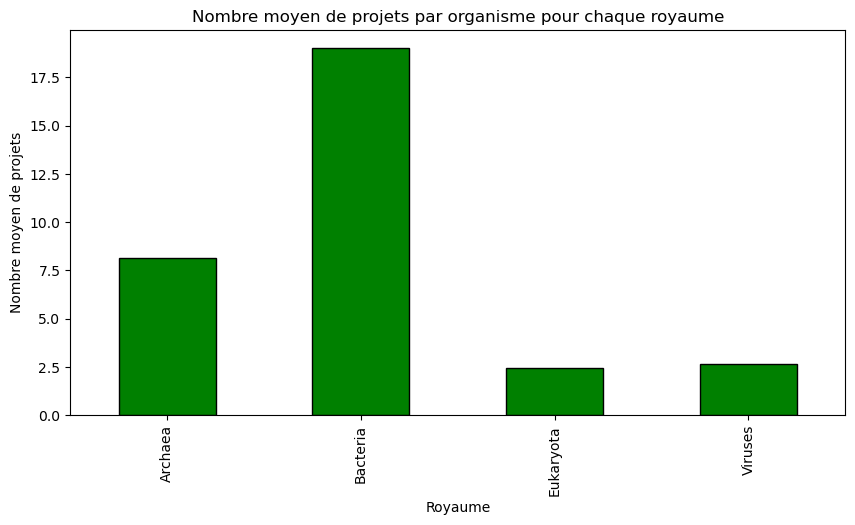

In [16]:
data['BioProjects'] = pd.to_numeric(data['BioProjects'], errors='coerce')
project_means = data.groupby('Kingdom')['BioProjects'].mean()

plt.figure(figsize=(10, 5))
project_means.plot(kind='bar', color='green', edgecolor='black')
plt.title('Nombre moyen de projets par organisme pour chaque royaume')
plt.xlabel('Royaume')
plt.ylabel('Nombre moyen de projets')
plt.show()

Q27. Combien d'organismes ont 0 projets ?

In [17]:
z = data[data['BioProjects'] == 0].shape[0]
print(z)

0


Q28. Combien d'organismes ont > 1 projets ?

In [18]:
sev = data[data['BioProjects'] >1].shape[0]
print(sev)

18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [19]:
top5 = data.nlargest(5, 'BioProjects')[['#Organism/Name', 'BioProjects']]
print(top5)

                             #Organism/Name  BioProjects
29710                      Escherichia coli      39907.0
41700                 Klebsiella pneumoniae      21229.0
75957                 Staphylococcus aureus      17228.0
70775                   Salmonella enterica      16613.0
83689  uncultured Lachnospiraceae bacterium      15909.0


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Ce sont des organismes qui ont un fort impact sur l'humain, notamment car ils causent des maladies.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
C'est la quantité de guanine et de cytosine dans une séquence d'ADN, cette partie est mésurée car elle est généralement plus stable et peut être plus riche en information.
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

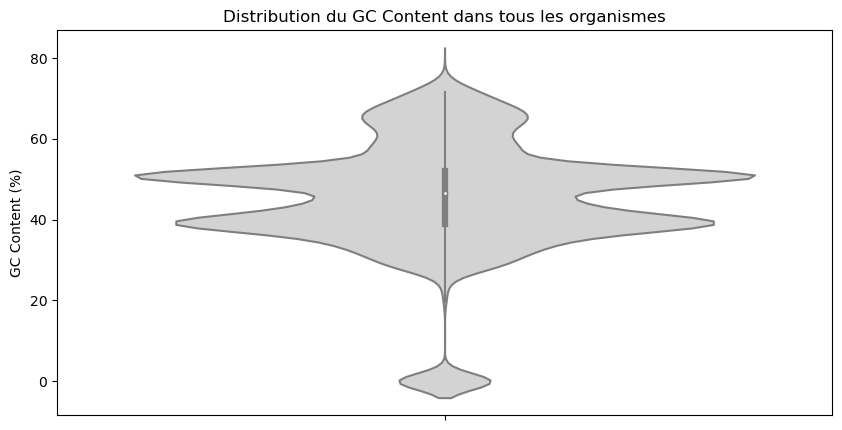

In [20]:
data = pd.read_csv('assembly_summary_genbank_historical.txt', sep='\t', skiprows=1)
data['gc_percent'] = pd.to_numeric(data['gc_percent'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.violinplot(y=data['gc_percent'], inner='box', color='lightgray')
plt.title('Distribution du GC Content dans tous les organismes')
plt.ylabel('GC Content (%)')
plt.show()

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

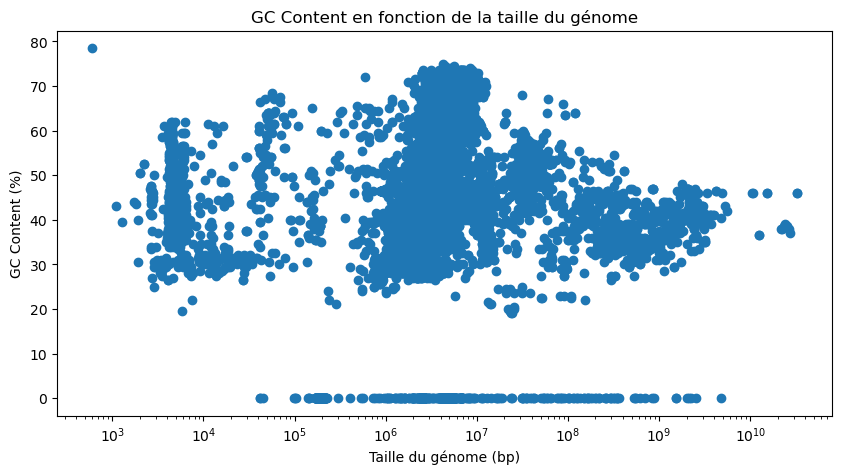

In [21]:
data['genome_size'] = pd.to_numeric(data['genome_size'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.scatter(data['genome_size'], data['gc_percent'])
plt.title('GC Content en fonction de la taille du génome')
plt.xscale('log')
plt.xlabel('Taille du génome (bp)')
plt.ylabel('GC Content (%)')
plt.show()

Q6. Qu'observez-vous ?

```markdown
Il y a moins de GC dans les plus gros génomes.
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

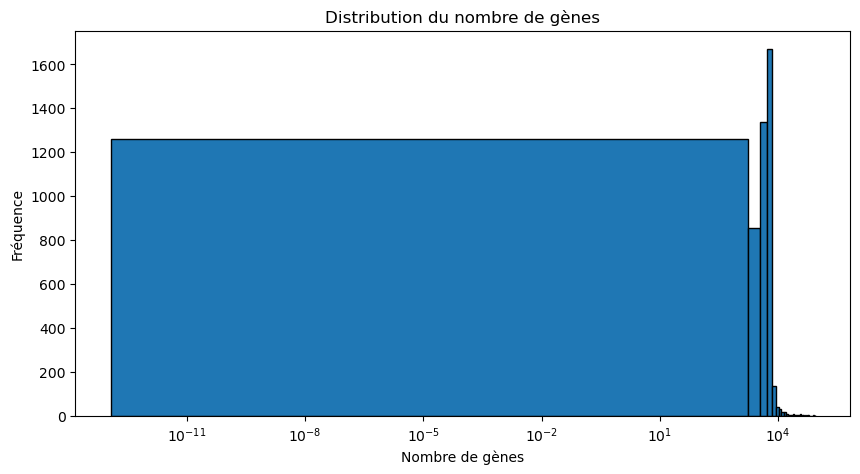

In [22]:
data['total_gene_count'] = pd.to_numeric(data['total_gene_count'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.hist(data['total_gene_count'], bins=50, edgecolor='black')
plt.title('Distribution du nombre de gènes')
plt.xscale('log')
plt.xlabel('Nombre de gènes')
plt.ylabel('Fréquence')
plt.show()

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

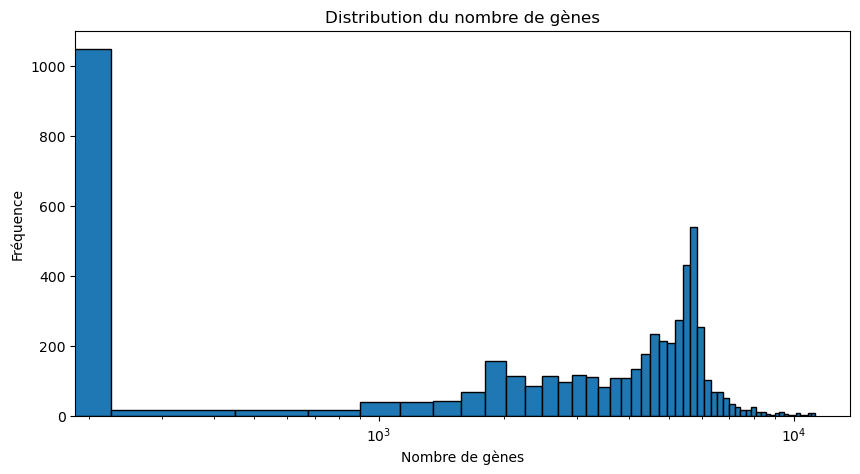

In [32]:
Q1 = data['total_gene_count'].quantile(0.25)
Q3 = data['total_gene_count'].quantile(0.75)
IQR = Q3 - Q1

fil = data[(data['total_gene_count']>=Q1-1.5*IQR) & (data['total_gene_count']<=Q3+1.5*IQR)]
plt.figure(figsize=(10,5))
plt.hist(fil['total_gene_count'], bins=50, edgecolor='black')
plt.title('Distribution du nombre de gènes')
plt.xscale('log')
plt.xlabel('Nombre de gènes')
plt.ylabel('Fréquence')
plt.show()

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
J'ai utilisé la méthode de l'écart interquartile. J'ai choisi les seuils PremierQuartile-1,5*IQR et TroisièmeQuartile+1,5*IQR
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [34]:
correlation = fil['genome_size'].corr(fil['total_gene_count'])
print("Corrélation:", correlation)

Corrélation: -0.11797356794985006


# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [25]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [26]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [27]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [28]:
#Votre code ici